## Data Visualization with Pandas

### Introduction

<img width="60%" class="imgright" src="../images/bees_and_cars.webp" srcset="../images/bees_and_cars_800w.webp 800w,../images/bees_and_cars_700w.webp 700w,../images/bees_and_cars_600w.webp 600w,../images/bees_and_cars_500w.webp 500w,../images/bees_and_cars_400w.webp 400w,../images/bees_and_cars_350w.webp 350w,../images/bees_and_cars_300w.webp 300w" alt="Pie Charts with Pandas" />

It is seldom a good idea to present your scientific or business data solely in rows and columns of numbers. We rather use various kinds of diagrams to visualize our data. This makes the communication of information more efficiently and easy to grasp. In other words, it makes complex data more accessible and understandable. The numerical data can be graphically encoded with line charts, bar charts, pie charts, histograms, scatterplots and others.

We have already seen the powerful capabilities of for creating publication-quality plots. Matplotlib is a low-level tool to achieve this goal, because you have to construe your plots by adding up basic components, like legends, tick labels, contours and so on.
Pandas provides various plotting possibilities, which make like a lot easier. 

We will start with an example for a line plot.

### Line Plot in Pandas

#### Series

Both the Pandas Series and DataFrame objects support a plot method. 

You can see a simple example of a line plot with for a Series object. We use a simple Python list "data" as the data for the range. The index will be used for the x values, or the domain. 

In [1]:
import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot()

It is possible to suppress the usage of the index by setting the keyword parameter "use_index" to False. In our example this will give us the same result:

In [2]:
s.plot(use_index=False)

We will experiment now with a Series which has an index consisting of alphabetical values. 

In [3]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S.plot()

#### Line Plots in DataFrames

We will introduce now the plot method of a DataFrame. We define a dcitionary with the population and area figures.  This dictionary can be used to create the DataFrame, which we want to use for plotting:

In [4]:
import pandas as pd

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}

city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


The following code plots our DataFrame city_frame. We will multiply the area column by 1000, because otherwise the "area" line would not be visible or in other words would be overlapping with the x axis:

In [5]:
city_frame["area"] *= 1000
city_frame.plot()

This plot is not coming up to our expectations, because not all the city names appear on the x axis. We can change this by defining the xticks explicitly with "range(len((city_frame.index))". Furthermore, we have to set use_index to True, so that we get city names and not numbers from 0 to len((city_frame.index):

In [6]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True)

Now, we have a new problem. The city names are overlapping. There is remedy at hand for this problem as well. We can rotate the strings  by 90 degrees. The names will be printed vertically afterwards:

In [7]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True, 
                rot=90)

#### Using Twin Axes

We multiplied the area column by 1000 to get a proper output. Instead of this, we could have used twin axes. We will demonstrate this in the following example. We will recreate the city_frame DataFrame to get the original area column:

In [8]:
city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


To get a twin axes represenation of our diagram, we need subplots from the module matplotlib and the function "twinx":

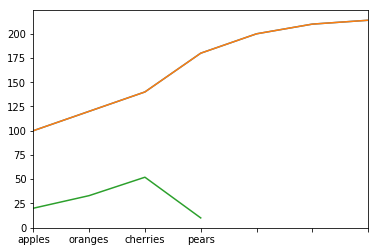

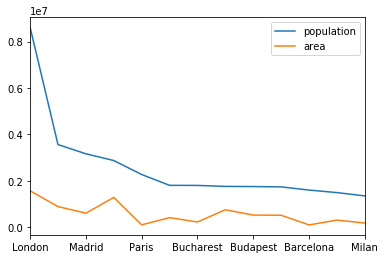

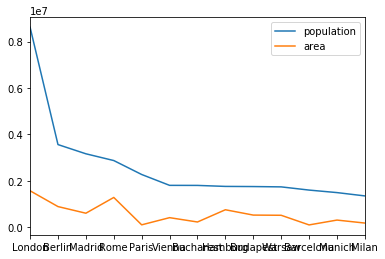

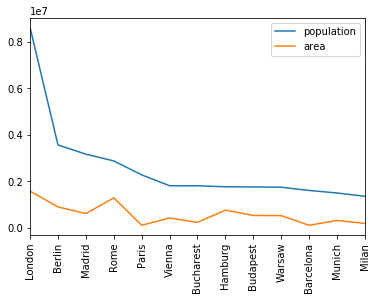

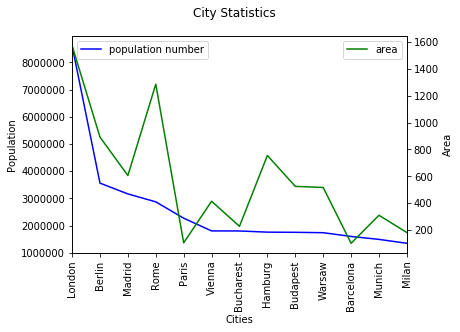

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Cities")

ax2 = ax.twinx()
ax2.set_ylabel("Area")

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax2, 
                        style="g-",
                        use_index=True, 
                        rot=90)

ax.legend(["population number"], loc=2)
ax2.legend(loc=1)

plt.show()

We can also create twin axis directly in Pandas without the aid of Matplotlib. We demonstrate this in the code of the following program:

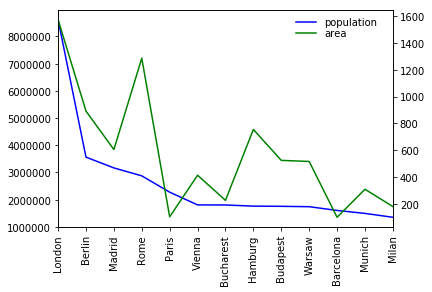

In [10]:
import matplotlib.pyplot as plt

ax1= city_frame["population"].plot(style="b-",
                                   xticks=range(len(city_frame.index)),
                                   use_index=True, 
                                   rot=90)
ax2 = ax1.twinx()

city_frame["area"].plot(ax=ax2,
                        style="g-",
                        use_index=True,
                        #secondary_y=True,
                        rot=90)



ax1.legend(loc = (.7,.9), frameon = False)
ax2.legend( loc = (.7, .85), frameon = False)

plt.show()

#### Multiple Y Axes

Let's add another axes to our city_frame. We will add a column with the population density, i.e. the number of people per square kilometre:

In [11]:
city_frame["density"] = city_frame["population"] / city_frame["area"]

city_frame

,population,area,density
London,8615246,1572.00,5480.436387
Berlin,3562166,891.85,3994.131300
Madrid,3165235,605.77,5225.143206
Rome,2874038,1285.00,2236.605447
Paris,2273305,105.40,21568.358634
Vienna,1805681,414.60,4355.236372
Bucharest,1803425,228.00,7909.758772
Hamburg,1760433,755.00,2331.699338
Budapest,1754000,525.20,3339.680122
Warsaw,1740119,517.00,3365.800774


Now we have three columns to plot. For this purpose, we will create three axes for our values:

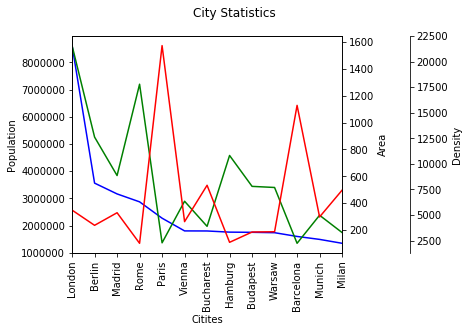

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Citites")

ax_area, ax_density = ax.twinx(), ax.twinx() 
ax_area.set_ylabel("Area")
ax_density.set_ylabel("Density")

rspine = ax_density.spines['right']
rspine.set_position(('axes', 1.25))
ax_density.set_frame_on(True)
ax_density.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax_area, 
                        style="g-",
                        use_index=True, 
                        rot=90)

city_frame["density"].plot(ax=ax_density, 
                           style="r-",
                           use_index=True, 
                           rot=90)

plt.show()

### A More Complex Example

We use the previously gained knowledge in the following example. We use a file with visitor statistics from our website python-course.eu. The content of the file looks like this:

<pre>
Month Year	"Unique visitors"	"Number of visits"	Pages	Hits	Bandwidth Unit
Jun 2010	11	13	42	290	2.63 MB
Jul 2010	27	39	232	939	9.42 MB
Aug 2010	75	87	207	1,096	17.37 MB
Sep 2010	171	221	480	2,373	39.63 MB

...

Apr 2018	434,346	663,327	1,143,762	7,723,268	377.56 GB
May 2018	402,390	619,993	1,124,517	7,307,779	394.72 GB
Jun 2018	369,739	573,102	1,034,335	6,773,820	386.60 GB
Jul 2018	352,670	552,519	  967,778	6,551,347	375.86 GB
Aug 2018	407,512	642,542	1,223,319	7,829,987	472.37 GB
Sep 2018	463,937	703,327	1,187,224	8,468,723	514.46 GB
Oct 2018	537,343	826,290	1,403,176  10,013,025	620.55 GB
Nov 2018	514,072	781,335	1,295,594	9,487,834	642.16 GB
</pre>

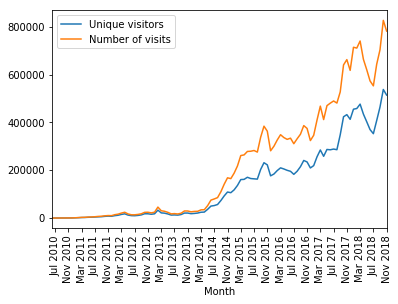

In [13]:
%matplotlib inline

import pandas as pd

data_path = "data1/"
data = pd.read_csv(data_path + "python_course_monthly_history.txt", 
                   quotechar='"',
                   thousands=",",
                   delimiter=r"\s+")

def unit_convert(x):
    value, unit = x
    if unit == "MB":
        value *= 1024
    elif unit == "GB":
        value *= 1048576 # i.e. 1024 **2
    return value

b_and_u= data[["Bandwidth", "Unit"]]
bandwidth = b_and_u.apply(unit_convert, axis=1)

del data["Unit"]
data["Bandwidth"] = bandwidth

month_year =  data[["Month", "Year"]]
month_year = month_year.apply(lambda x: x[0] + " " + str(x[1]), 
                              axis=1)
data["Month"] = month_year
del data["Year"]

data.set_index("Month", inplace=True)
del data["Bandwidth"]

data[["Unique visitors", "Number of visits"]].plot(use_index=True, 
                                                   rot=90,
                                                   xticks=range(1, len(data.index),4))

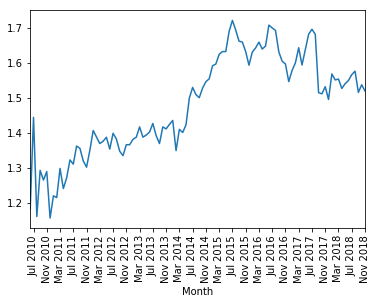

In [14]:
ratio = pd.Series(data["Number of visits"] / data["Unique visitors"],
                  index=data.index)
ratio.plot(use_index=True, 
           xticks=range(1, len(ratio.index),4),
           rot=90)

#### Converting String Columns to Floats

In the folder "data1", we have a file called 

"tiobe_programming_language_usage_nov2018.txt" 

with a ranking of programming languages by usage. The data has been collected and created by TIOBE in November 2018.

The file looks like this:

<pre>
Position	"Language" 	Percentage
1		Java	16.748%
2		C	14.396%	
3		C++	8.282%	
4		Python	7.683%	
5		"Visual Basic .NET"	6.490%
6		C#	3.952%
7		JavaScript	2.655%
8		PHP	2.376%
9		SQL	1.844%
</pre>

The percentage column contains strings with a percentage sign. We can get rid of this when we read in the data with read_csv. All we have to do is define a converter function, which we to read_csv via the converters dictionary, which contains column names as keys and references to functions as values. 

                   Percentage
Language                     
Java                   16.748
C                      14.396
C++                     8.282
Python                  7.683
Visual Basic .NET       6.490
C#                      3.952


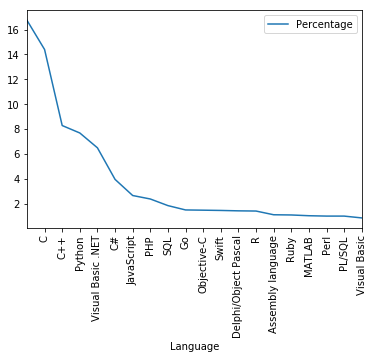

In [24]:
def strip_percentage_sign(x):
    return float(x.strip('%'))

data_path = "data1/"
progs = pd.read_csv(data_path + "tiobe_programming_language_usage_nov2018.txt", 
                   quotechar='"',
                   thousands=",",
                   index_col=1,
                   converters={'Percentage':strip_percentage_sign},
                   delimiter=r"\s+")

del progs["Position"]

print(progs.head(6))
progs.plot(xticks=range(1, len(progs.index)),
           use_index=True, rot=90)

plt.show()

### Bar Plots in Pandas

To create bar plots with Pandas is as easy as plotting line plots. All we have to do is add the keyword parameter "kind" to the plot method and set it to "bar".

#### A Simple Example

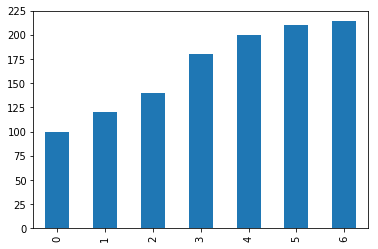

In [16]:
import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot(kind="bar")

#### Bar Plot for Programming Language Usage

Let's get back to our programming language ranking. We will printout now a bar plot of the six most used programming languages:

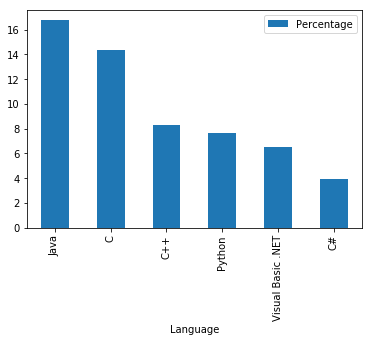

In [17]:
progs[:6].plot(kind="bar")

Now the whole chart with all programming languages:

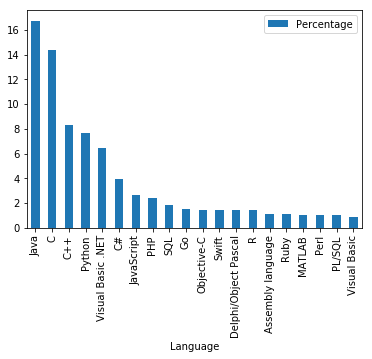

In [18]:
progs.plot(kind="bar")

#### Colorize A Bar Plot

It is possible to colorize the bars indivually by assigning a list to the keyword parameter color:

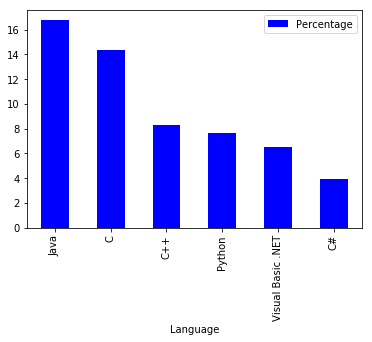

In [19]:
my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs[:6].plot(kind="bar",
               color=my_colors)

### Pie Chart Diagrams in Pandas

A simple example:

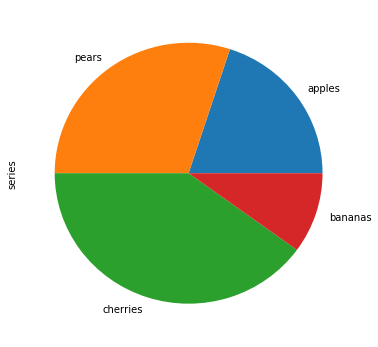

In [20]:
import pandas as pd

fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')

series.plot.pie(figsize=(6, 6))

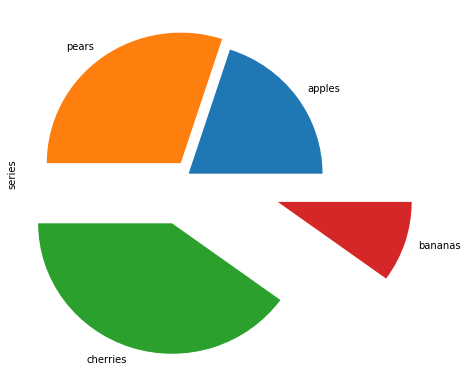

In [21]:
fruits = ['apples', 'pears', 'cherries', 'bananas']

series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')
explode = [0, 0.10, 0.40, 0.7]
series.plot.pie(figsize=(6, 6),
                explode=explode)





We will replot the previous bar plot as a pie chart plot:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9832440b8>], dtype=object)

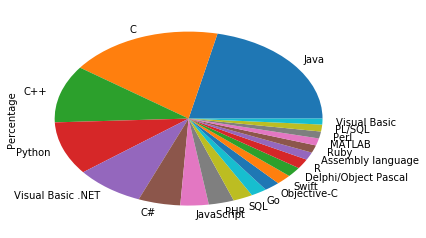

In [22]:
import matplotlib.pyplot as plt

my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs.plot.pie(subplots=True,
               legend=False)


It looks ugly that we see the y label "Percentage" inside our pie plot. We can remove it by calling "plt.ylabel('')"

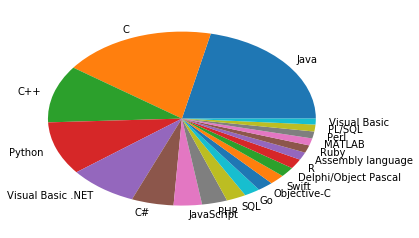

In [23]:
import matplotlib.pyplot as plt

my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs.plot.pie(subplots=True,
               legend=False)

plt.ylabel('')